## Research question1

**1)What is the distribution of entities in the director-crew dataset:**
* Number of featured movies?
* Number of directors, number movies per director, and average number of movies per director?
* Number of crews?
* Number of roles and frequency of each role?

In [55]:
import os
import pandas as pd
import json

main_directory = r'C:\Users\nayak\OneDrive\Desktop\Network-Analysis-data-641-01\group_project\film-directors'

def count_directors_and_movies(main_directory):
    directors_data = []
    total_movies = 0
    unique_movies = set()  # Set to store unique movie titles
    for director_dir in os.listdir(main_directory):
        director_path = os.path.join(main_directory, director_dir)
        if os.path.isdir(director_path):
            normalized_data_dir = os.path.join(director_path, 'normalized_data')
            if os.path.exists(normalized_data_dir) and os.path.isdir(normalized_data_dir):
                featured_movies = [file for file in os.listdir(normalized_data_dir) if file.endswith('.json')]
                for file in featured_movies:
                    title_id = file.split('_')[0]
                    unique_movies.add(title_id)  # Add the movie to the set
                # num_movies = len(unique_movies) # Add the movie to the set
                num_movies1 = len(featured_movies)

                directors_data.append({'Director ID': director_dir, 'Number of Movies': num_movies1})
                # unique_movies.clear()  # Clear the set for the next director
    
    total_movies = len(unique_movies)
    df_directors = pd.DataFrame(directors_data)
    num_directors = len(df_directors)
    avg_movies_per_director = total_movies / num_directors if num_directors > 0 else 0
    
    return df_directors, total_movies, avg_movies_per_director

directors_df, total_movies, avg_movies_per_director = count_directors_and_movies(main_directory)

print(f"Number of directors: {len(directors_df)}")
print(f"Total no. of featured movies is: {total_movies}")
print(f"Average number of movies per director is: {avg_movies_per_director}")
print(f"Number of movies per director:\n{directors_df.to_string(index=False)}")


Number of directors: 101
Total no. of featured movies is: 1383
Average number of movies per director is: 13.693069306930694
Number of movies per director:
Director ID  Number of Movies
  nm0000095                53
  nm0000116                12
  nm0000142                41
  nm0000165                36
  nm0000186                20
  nm0000217                40
  nm0000229                40
  nm0000231                25
  nm0000233                14
  nm0000318                20
  nm0000338                28
  nm0000343                23
  nm0000361                32
  nm0000386                18
  nm0000399                20
  nm0000464                17
  nm0000487                14
  nm0000490                40
  nm0000500                24
  nm0000517                10
  nm0000520                14
  nm0000600                17
  nm0000631                30
  nm0000709                24
  nm0000759                 9
  nm0000777                11
  nm0000876                13
  nm0

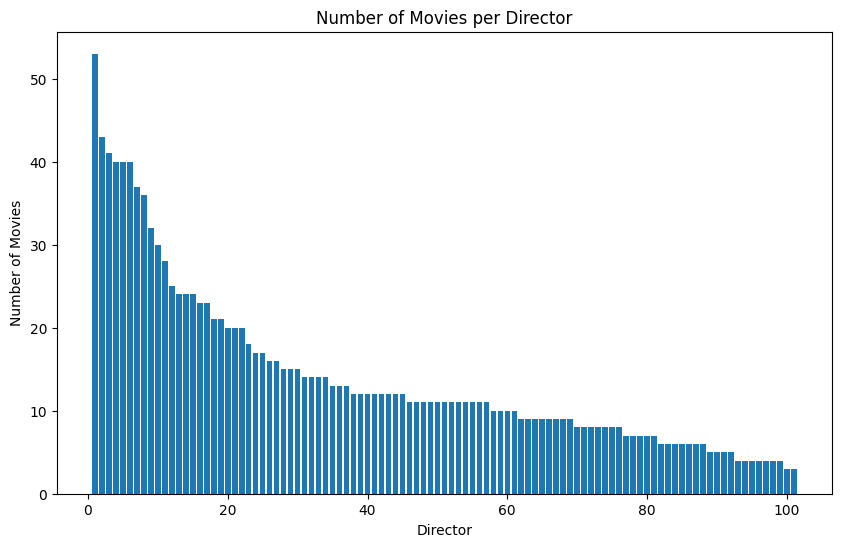

In [59]:
import matplotlib.pyplot as plt
# Sort directors_df by 'Number of Movies' in descending order
directors_df_sorted = directors_df.sort_values('Number of Movies', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(directors_df_sorted)+1), directors_df_sorted['Number of Movies'])
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Director')
plt.show()

Note: There are 1383 unique movies. If we simply add the no. of movies directed by each director then it is 1415. The diffrence is because 2 directors can have same movies.

In [7]:
import re
crews_data = []

for director_dir in os.listdir(main_directory):
    director_path = os.path.join(main_directory, director_dir)
    if os.path.isdir(director_path):
        normalized_data_dir = os.path.join(director_path, 'normalized_data')
        if os.path.exists(normalized_data_dir) and os.path.isdir(normalized_data_dir):
            for file_name in os.listdir(normalized_data_dir):
                if file_name.endswith('.json'):
                    file_path = os.path.join(normalized_data_dir, file_name)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        data = json.load(file)
                        title_id = file_name.split('_')[0]

                        # Extract year from the title using regular expressions
                        match = re.search(r"\((.*\b(\d{4})\b.*)\)", data['title'])
                        year = match.group(2) if match else "Year not found"
                        if year is None:
                            print("Error extracting year for:", director_dir, title_id)
                            year = "Unknown"


                        for credit in data['full_credits']:
                            role = credit['role']
                            normalized_role = credit.get('normalized role', '')
                            for crew_member in credit['crew']:
                                crew_data = {
                                    'Director ID': director_dir,
                                    'Title ID': title_id,
                                    'Role': role,
                                    'Normalized Role': normalized_role,
                                    'Crew Name': crew_member['name'],
                                    'Crew Link': crew_member['link'],
                                    'Subrole': crew_member.get('normalized_credit', ''),
                                    'Movie Year': year
                                }
                                crews_data.append(crew_data)

crews_df = pd.DataFrame(crews_data)


In [129]:
title1 = "Don't Drink the Water (htydgd ftydytd tseser rtsets 1994)"
title = "1492: Conquest of Paradise (1992)"
match = re.search(r"\((\d{4})\)", title1)
print(match)

None


In [8]:
## Formating the contents of Subrole column as it is in list format
import re
def extract_letters(subrole):
    if isinstance(subrole, list):
        # If subrole is a list, join its elements into a single string
        subrole_str = ' '.join(subrole)
    else:
        subrole_str = subrole
    
    # Remove non-alphabetic characters from the string
    return re.sub(r'[^a-zA-Z\s]', '', subrole_str)
    # return re.sub(r'[^a-zA-Z]', '', subrole_str)

# Test the function
crews_df['Subrole'] = crews_df['Subrole'].apply(extract_letters)
# crews_df['Subrole']

# Function to extract Crew ID
def extract_crew_id(url):
    parts = url.split('/')
    for part in parts:
        if 'nm' in part:
            return part
    return None

# Applying the function to the 'Crew Link' column
crews_df['Crew ID'] = crews_df['Crew Link'].apply(extract_crew_id)

crews_df.to_csv('crew.csv', index=False)
crews_df


,Director ID,Title ID,Role,Normalized Role,Crew Name,Crew Link,Subrole,Movie Year,Crew ID
0,nm0000095,tt0061177,Directed by,Directed by,Woody Allen,https://www.imdb.com/name/nm0000095/?ref_=ttfc...,aided abetted by,1966,nm0000095
1,nm0000095,tt0061177,Directed by,Directed by,Senkichi Taniguchi,https://www.imdb.com/name/nm0849474/?ref_=ttfc...,original japanese version,1966,nm0849474
2,nm0000095,tt0061177,Writing Credits,Writing Credits,Woody Allen,https://www.imdb.com/name/nm0000095/?ref_=ttfc...,special material by,1966,nm0000095
3,nm0000095,tt0061177,Writing Credits,Writing Credits,Frank Buxton,https://www.imdb.com/name/nm0125518/?ref_=ttfc...,with writings by,1966,nm0125518
4,nm0000095,tt0061177,Writing Credits,Writing Credits,Louise Lasser,https://www.imdb.com/name/nm0489837/?ref_=ttfc...,with writings by,1966,nm0489837
...,...,...,...,...,...,...,...,...,...
688006,nm3363032,tt9114286,Thanks,Thanks,Larry Stroman,https://www.imdb.com/name/nm7975106/?ref_=ttfc...,with special thanks to,2022,nm7975106
688007,nm3363032,tt9114286,Thanks,Thanks,Mark Texeira,https://www.imdb.com/name/nm4088173/?ref_=ttfc...,with special thanks to,2022,nm4088173
688008,nm3363032,tt9114286,Thanks,Thanks,Jocelyn Thomas,https://www.imdb.com/name/nm0859036/?ref_=ttfc...,special thanks,2022,nm0859036
688009,nm3363032,tt9114286,Thanks,Thanks,Roy Thomas,https://www.imdb.com/name/nm0859471/?ref_=ttfc...,with special thanks to,2022,nm0859471


In [9]:
### Filtering the roles that we want
roles_to_include = [
    'Casting By', 
    'Cinematography by', 
    'Costume Design by',  
    'Film Editing by', 
    'Music by', 
    'Production Design by', 
    'Writing Credits'
]

filtered_df = crews_df[crews_df['Normalized Role'].isin(roles_to_include)]
print(len(filtered_df))

directed_by_df = crews_df[
    (crews_df['Normalized Role']==  'Directed by') &
    (crews_df['Director ID'] == crews_df['Crew ID'])
]
print(len(directed_by_df))

makeup_department_df = crews_df[
    (crews_df['Normalized Role'] == 'Makeup Department') &
    ((crews_df['Subrole'] == 'hair department head') | (crews_df['Subrole'] == 'makeup department head'))
]

print(len(makeup_department_df))

produced_by_df = crews_df[
    (crews_df['Normalized Role'] == 'Produced by') &
    ((crews_df['Subrole'] == 'producer') | (crews_df['Subrole'] == 'producer produced by')|(crews_df['Subrole'] == 'producer produced by pga'))
]
print(len(produced_by_df))

Sound_department_df = crews_df[
    (crews_df['Normalized Role'] == 'Sound Department') &
    ((crews_df['Subrole'] == 'rerecording mixer') | (crews_df['Subrole'] == 'sound designer')|(crews_df['Subrole'] == 'supervising sound editor'))
]
print(len(Sound_department_df))

special_effects_df = crews_df[
    (crews_df['Normalized Role'] == 'Special Effects by') &
    ((crews_df['Subrole'] == 'special effects supervisor') | (crews_df['Subrole'] == 'visual effects supervisor'))
]

print(len(special_effects_df))

11804
1415
845
3849
3489
625


In [10]:
# Concatenate all the dataframes
all_roles_df = pd.concat([directed_by_df, makeup_department_df, produced_by_df, Sound_department_df, special_effects_df, filtered_df])

# Reset the index of the concatenated dataframe
all_roles_df = all_roles_df.reset_index(drop=True)

# Print the length of the concatenated dataframe
print(len(all_roles_df))

# Print the concatenated dataframe
print(all_roles_df)


22027
      Director ID   Title ID                  Role       Normalized Role  \
0       nm0000095  tt0061177           Directed by           Directed by   
1       nm0000095  tt0065063           Directed by           Directed by   
2       nm0000095  tt0066808           Directed by           Directed by   
3       nm0000095  tt0068555           Directed by           Directed by   
4       nm0000095  tt0070707           Directed by           Directed by   
...           ...        ...                   ...                   ...   
22022   nm3363032  tt9114286              Music by              Music by   
22023   nm3363032  tt9114286     Cinematography by     Cinematography by   
22024   nm3363032  tt9114286            Casting By            Casting By   
22025   nm3363032  tt9114286  Production Design by  Production Design by   
22026   nm3363032  tt9114286     Costume Design by     Costume Design by   

                   Crew Name  \
0                Woody Allen   
1                

In [11]:
all_roles_df.columns

Index(['Director ID', 'Title ID', 'Role', 'Normalized Role', 'Crew Name',
       'Crew Link', 'Subrole', 'Movie Year', 'Crew ID'],
      dtype='object')

In [12]:
# print(directed_by_df)

# Calculate number of unique elements in the 'Crew ID' column
unique_crew_ids = directed_by_df['Crew ID'].nunique()
print("Number of unique Crew IDs:", unique_crew_ids)

# Calculate number of unique elements in the 'Director ID' column
unique_director_ids = directed_by_df['Director ID'].nunique()
print("Number of unique Director IDs:", unique_director_ids)

Number of unique Crew IDs: 101
Number of unique Director IDs: 101


In [13]:
directed_by_df['Crew ID'].value_counts().sum()
print(len(directed_by_df))
directed_by_df

1415


,Director ID,Title ID,Role,Normalized Role,Crew Name,Crew Link,Subrole,Movie Year,Crew ID
0,nm0000095,tt0061177,Directed by,Directed by,Woody Allen,https://www.imdb.com/name/nm0000095/?ref_=ttfc...,aided abetted by,1966,nm0000095
27,nm0000095,tt0065063,Directed by,Directed by,Woody Allen,https://www.imdb.com/name/nm0000095/?ref_=ttfc...,,1969,nm0000095
80,nm0000095,tt0066808,Directed by,Directed by,Woody Allen,https://www.imdb.com/name/nm0000095/?ref_=ttfc...,,1971,nm0000095
136,nm0000095,tt0068555,Directed by,Directed by,Woody Allen,https://www.imdb.com/name/nm0000095/?ref_=ttfc...,,1972,nm0000095
196,nm0000095,tt0070707,Directed by,Directed by,Woody Allen,https://www.imdb.com/name/nm0000095/?ref_=ttfc...,,1973,nm0000095
...,...,...,...,...,...,...,...,...,...
678419,nm2125482,tt9770150,Directed by,Directed by,Chloé Zhao,https://www.imdb.com/name/nm2125482/?ref_=ttfc...,,2020,nm2125482
678561,nm3363032,tt1825683,Directed by,Directed by,Ryan Coogler,https://www.imdb.com/name/nm3363032/?ref_=ttfc...,,2018,nm3363032
682031,nm3363032,tt2334649,Directed by,Directed by,Ryan Coogler,https://www.imdb.com/name/nm3363032/?ref_=ttfc...,,2013,nm3363032
682370,nm3363032,tt3076658,Directed by,Directed by,Ryan Coogler,https://www.imdb.com/name/nm3363032/?ref_=ttfc...,,2015,nm3363032


In [14]:
# Drop duplicates based on 'Name' and 'Credit' columns to consider unique crew members
unique_crew_df = all_roles_df.drop_duplicates(subset=['Crew Name'])

# Get the total number of unique crew members
total_unique_crew = len(unique_crew_df)
print(f"Total number of unique crew members: {total_unique_crew}")


Total number of unique crew members: 7577


In [15]:
# Calculate the frequency of each role
role_frequency = all_roles_df['Normalized Role'].value_counts()

# Print the number of roles
print("Number of roles:", len(role_frequency))

# Print the frequency of each role
print("Frequency of each role:")
print(role_frequency)


Number of roles: 11
Frequency of each role:
Normalized Role
Produced by             3849
Writing Credits         3814
Sound Department        3489
Cinematography by       1932
Casting By              1912
Music by                1521
Directed by             1415
Production Design by    1359
Costume Design by       1266
Makeup Department        845
Special Effects by       625
Name: count, dtype: int64


In [16]:
# Define the roles and corresponding subroles
roles_subroles = {
    'Makeup Department': ['hair department head', 'makeup department head'],
    'Produced by': ['producer', 'producer produced by', 'producer produced by pga'],
    'Sound Department': ['rerecording mixer', 'sound designer', 'supervising sound editor'],
    'Special Effects by': ['special effects supervisor', 'visual effects supervisor']
}

# Initialize a dictionary to store the frequency of subroles
subrole_frequency = {}

# Calculate the frequency of each subrole for the specified roles
for role, subroles in roles_subroles.items():
    for subrole in subroles:
        count = len(all_roles_df[(all_roles_df['Normalized Role'] == role) & (all_roles_df['Subrole'] == subrole)])
        subrole_frequency[f"{role} - {subrole}"] = count

# Print the frequency of each subrole
print("Frequency of each subrole:")
for subrole, count in subrole_frequency.items():
    print(f"{subrole}: {count}")


Frequency of each subrole:
Makeup Department - hair department head: 384
Makeup Department - makeup department head: 461
Produced by - producer: 3046
Produced by - producer produced by: 592
Produced by - producer produced by pga: 211
Sound Department - rerecording mixer: 2106
Sound Department - sound designer: 535
Sound Department - supervising sound editor: 848
Special Effects by - special effects supervisor: 624
Special Effects by - visual effects supervisor: 1


###**Q2. How will you characterize the film-director network? What are the properties (degree dist., average shortest path length, triangles aka clustering coefficient, density/sparcity)?**

In [17]:
filtered_crews_df = all_roles_df[all_roles_df['Crew ID'] != all_roles_df['Director ID']]

# Read the CSV file
director_info_df = pd.read_csv(r"C:\Users\nayak\OneDrive\Desktop\Network-Analysis-data-641-01\group_project\100_film_directors.csv")

# Extract 'Director ID' from 'IMDb_URI'
director_info_df['Director ID'] = director_info_df['IMDb_URI'].apply(lambda x: re.search(r'nm\d+', x).group(0) if re.search(r'nm\d+', x) else None)
# director_info_df['Director ID'] = director_info_df['IMDb_URI'].str.extract(r'/nm(\d+)/')

# Assuming `filtered_crews_df` is your DataFrame containing crew information
# Merge the two DataFrames on 'Director ID'
visualization_df = filtered_crews_df.merge(director_info_df[['Director ID', 'Sex', 'Ethnicity_Race']], on='Director ID', how='left')

# Print the updated DataFrame
# print(visualization_df)



## **Network Creation**

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming `visualization_df` contains the DataFrame with 'Director ID', 'Crew ID' columns

# Create an empty graph
G = nx.Graph()

# Add nodes for director IDs
director_nodes = list(visualization_df['Director ID'].unique())
for director_node in director_nodes:
    sex = visualization_df.loc[visualization_df['Director ID'] == director_node, 'Sex'].iloc[0]
    ethnicity_race = visualization_df.loc[visualization_df['Director ID'] == director_node, 'Ethnicity_Race'].iloc[0]
    G.add_node(director_node, sex=sex, ethnicity_race=ethnicity_race)

# Add nodes for crew IDs
crew_nodes = list(visualization_df['Crew ID'].unique())
for crew_node in crew_nodes:
    G.add_node(crew_node)

# Add edges between director IDs and crew IDs if they have worked together
edges = list(zip(visualization_df['Director ID'], visualization_df['Crew ID']))
G.add_edges_from(edges)

# Calculate node sizes based on degree
degree_dict = dict(G.degree)
node_sizes = [10 * degree_dict.get(node, 1) for node in G.nodes]

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Position nodes using a spring layout algorithm
nx.draw(G, pos, node_size=node_sizes, with_labels=False, edge_color='gray')
plt.show()

# Save the graph as a GraphML file
nx.write_graphml(G, "network.graphml")


I have visualized the network in Gephi and have attached the picture here

![Project Logo](Network_visualization.png "Director-Crew Network")


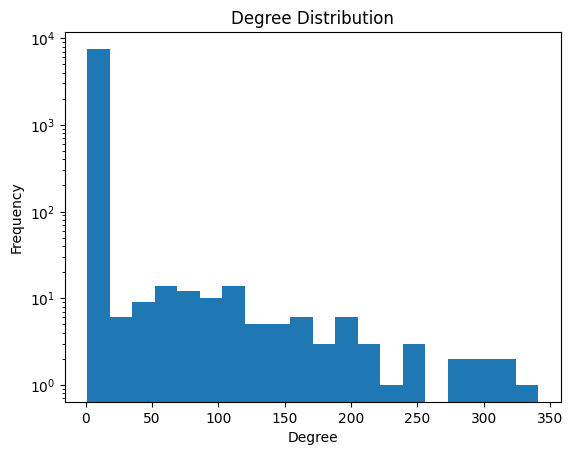

Average Shortest Path Length: 4.056669758878281
Clustering Coefficient: 0.05151931382916671
Density: 0.00042924938678042413


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph from the GraphML file
G = nx.read_graphml("network.graphml")

# Degree Distribution
degree_sequence = [d for n, d in G.degree()]
plt.hist(degree_sequence, bins=20)
plt.yscale('log')  # Set y-axis to log scale
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Average Shortest Path Length
average_shortest_path_length = nx.average_shortest_path_length(G)
print(f"Average Shortest Path Length: {average_shortest_path_length}")

# Clustering Coefficient (Triangles)
clustering_coefficient = nx.average_clustering(G)
print(f"Clustering Coefficient: {clustering_coefficient}")

# Density (Sparcity)
density = nx.density(G)
print(f"Density: {density}")


#### Answer

To characterize the film-director network, we can construct a network where directors and films are nodes, and the relationships (edges) between them signify if the crew has worked with the director or not. 

* The plot of degree distribution indicates that the majority of crews (95%) have relatively low collaboration connections (degree) with other nodes (directors or crews), typically between 10 to 20 collaborations. However, there is a smaller subset (5%) of crews that have significantly higher collaboration connections, ranging from 50 to 250. 

* The average shortest path length of 4.056 indicates that, on average, it takes approximately 4 steps (or collaborations) to connect any two nodes (director or crew) in the network which represents Small World property.  

* The clustering coefficient of 0.052 indicates the extent to which nodes in the network tend to cluster together. In other words, it shows the likelihood that two nodes that are connected to the same node are also connected to each other. The low clustering coefficient suggests that the network is less clustered, meaning nodes are less likely to form tightly interconnected groups.

* The density of 0.00043 indicates the proportion of actual edges in the network relative to the total number of possible edges. It reflects how "full" the network is, with a lower density it indicates that the Director-Crew  network is sparse.

### Research Question - 1
#### **Investigate and quantify how directors have influenced the careers of crew members.**

**Frquency of collaboration**

In [18]:
# Filter the DataFrame to exclude cases where Crew ID is the same as Director ID
filtered_crews_df = all_roles_df[all_roles_df['Crew ID'] != all_roles_df['Director ID']]

# Group by Crew ID and Director ID, count the number of collaborations
collaboration_counts = filtered_crews_df.groupby(['Crew ID', 'Director ID']).size().reset_index(name='Collaborations')

# Merge this back with the crew information to get names and roles
crew_director_collaboration = pd.merge(collaboration_counts, filtered_crews_df[['Crew ID', 'Crew Name', 'Normalized Role']], on='Crew ID', how='left').drop_duplicates()

# Analyze top collaborations
top_collaborations = crew_director_collaboration.sort_values(by='Collaborations', ascending=False)
print(top_collaborations.head())



         Crew ID Director ID  Collaborations       Crew Name  \
52094  nm0852681   nm0000095              43   Juliet Taylor   
1551   nm0001053   nm0001054              37      Ethan Coen   
1533   nm0001053   nm0001054              37      Ethan Coen   
35806  nm0520288   nm0000095              30  Santo Loquasto   
35809  nm0520288   nm0000095              30  Santo Loquasto   

            Normalized Role  
52094            Casting By  
1551        Writing Credits  
1533            Produced by  
35806     Costume Design by  
35809  Production Design by  


**Career advancement**

In [19]:
## This refined hierarchy assigns a unique rank to each role. Higher numbers denote roles with greater impact and responsibility.
roles_hierarchy = {
    'Casting By': 3,
    'Cinematography by': 8,
    'Costume Design by': 6,
    'Directed by': 12,
    'Film Editing by': 7,
    'Music by': 9,
    'Production Design by': 10,
    'Writing Credits': 11,
    'Makeup Department': 4,
    'Produced by': 12,  # Equal to director as both are key to production
    'Sound Department': 5,
    'Special Effects by': 4
}



# Create a DataFrame to analyze career progression
career_progression = filtered_crews_df.sort_values(by=['Crew ID', 'Movie Year'])
career_progression['Previous Role'] = career_progression.groupby('Crew ID')['Normalized Role'].shift(1)

# Define a function to classify if there is an advancement
def role_advancement(current, previous):
    # Use the hierarchy defined above
    return roles_hierarchy.get(current, 0) > roles_hierarchy.get(previous, 0)

# Apply the function to determine if each role change was an advancement
career_progression['Advanced'] = career_progression.apply(lambda x: role_advancement(x['Normalized Role'], x['Previous Role']), axis=1)

# Count advancements per director
advancements_by_director = career_progression.groupby('Director ID')['Advanced'].sum().reset_index()
print(advancements_by_director.sort_values(by='Advanced', ascending=False))


    Director ID  Advanced
3     nm0000165       204
5     nm0000217       202
17    nm0000490       190
6     nm0000229       183
22    nm0000631       176
..          ...       ...
100   nm3363032        18
95    nm1802161        16
83    nm0905154        16
92    nm1503575        13
90    nm1443502        11

[101 rows x 2 columns]


The numbers in the output represent the total number of times crew members have advanced in their careers when working under a specific director. Each row consists of a Director ID paired with a count of Advanced instances.

For example:

Director nm0000165 (Ron Howard): This director has seen 211 advancements in their crew members' careers. This means on all the projects this director has helmed, there have been 211 instances where crew members have moved to a higher ranked role from one project to the next.

Higher numbers suggest that working under these directors may offer more opportunities for career growth within the film industry. Crew members might be given more responsibilities or promoted to more impactful roles.

However, simply tracking role advancements doesn't necessarily indicate that a director has positively influenced a crew member's career, particularly if we don't consider other factors such as the continuity of employment, the quality of the roles, or the overall career trajectory of the individual. Role advancement could be incidental rather than a result of the director's influence.

In [147]:
# print(career_progression)
career_progression.to_csv("career_progression.csv")

Modified Approach to Analyzing Director Influence
In the following code, we are analyzing the impact of directors on crew members' careers based on their collaborations. We start by creating an interaction matrix that represents the collaborations between directors and crew members. Next, we calculate the total collaborations for each crew member. Then, we iterate through the interaction matrix to determine the roles before and after collaboration for each crew member and director pair. We create a DataFrame with this information, including the crew ID, director ID, roles before collaboration, roles after collaboration, and calculate the impact estimate as the difference between roles after and before collaboration. Finally, we drop any rows with NaN values in 'Roles After Collaboration' and print the results sorted by the impact estimate in descending order.


In [69]:
# Calculate the year of first collaboration for each crew with each director

all_roles_df_filtered = filtered_crews_df[filtered_crews_df['Movie Year'].astype(str).str.strip() != 'Year not found'].copy()
first_collab_years = all_roles_df_filtered.groupby(['Crew ID', 'Director ID'])['Movie Year'].min()

interaction_matrix = pd.crosstab(all_roles_df_filtered['Crew ID'], all_roles_df_filtered['Director ID'])
interaction_matrix = pd.DataFrame(interaction_matrix)


# total_collaborations = interaction_matrix.sum(axis=1)
# Step 2: Analyze the impact of directors on crew members' careers
impact_analysis_results = []
for crew_id in interaction_matrix.index:
    for director_id in interaction_matrix.columns:
        if interaction_matrix.loc[crew_id, director_id] > 0:
            # Get the year of first collaboration
            first_collab_year = first_collab_years.get((crew_id, director_id), None)
            if first_collab_year is not None:
                # Calculate roles before and after collaboration based on the year of first collaboration
                roles_before = all_roles_df_filtered[(all_roles_df_filtered['Crew ID'] == crew_id) & 
                                                  (all_roles_df_filtered['Movie Year'] < first_collab_year)].shape[0]
                roles_after = all_roles_df_filtered[(all_roles_df_filtered['Crew ID'] == crew_id) & 
                                                 (all_roles_df_filtered['Movie Year'] >= first_collab_year)].shape[0]
                impact_analysis_results.append({
                    'Crew ID': crew_id,
                    'Director ID': director_id,
                    'Roles Before Collaboration': roles_before,
                    'Roles After Collaboration': roles_after
                })

# Step 3: Create DataFrame from results
impact_analysis_df = pd.DataFrame(impact_analysis_results)

# Step 4: Drop rows with NaN values in 'Roles After Collaboration' if any
impact_analysis_df.dropna(subset=['Roles After Collaboration'], inplace=True)

# # Step 6: Calculate impact estimate
impact_analysis_df['Impact Estimate'] = impact_analysis_df['Roles After Collaboration'] - impact_analysis_df['Roles Before Collaboration']

# Step 7: Print results
print(impact_analysis_df.sort_values('Impact Estimate', ascending=False))


         Crew ID Director ID  Roles Before Collaboration  \
3415   nm0281530   nm0000361                           0   
3412   nm0281530   nm0000217                           1   
3414   nm0281530   nm0000338                           3   
7784   nm0783713   nm0000186                           0   
2930   nm0225226   nm0000338                           0   
...          ...         ...                         ...   
333    nm0001877   nm1560977                          39   
11024  nm2263224   nm1443502                          42   
8699   nm0894611   nm0336620                          40   
7800   nm0783713   nm0868219                          48   
7791   nm0783713   nm0000709                          50   

       Roles After Collaboration  Impact Estimate  
3415                          59               59  
3412                          58               57  
3414                          56               53  
7784                          51               51  
2930               

In [26]:
impact_analysis_df.to_csv("impact_analysis.csv")

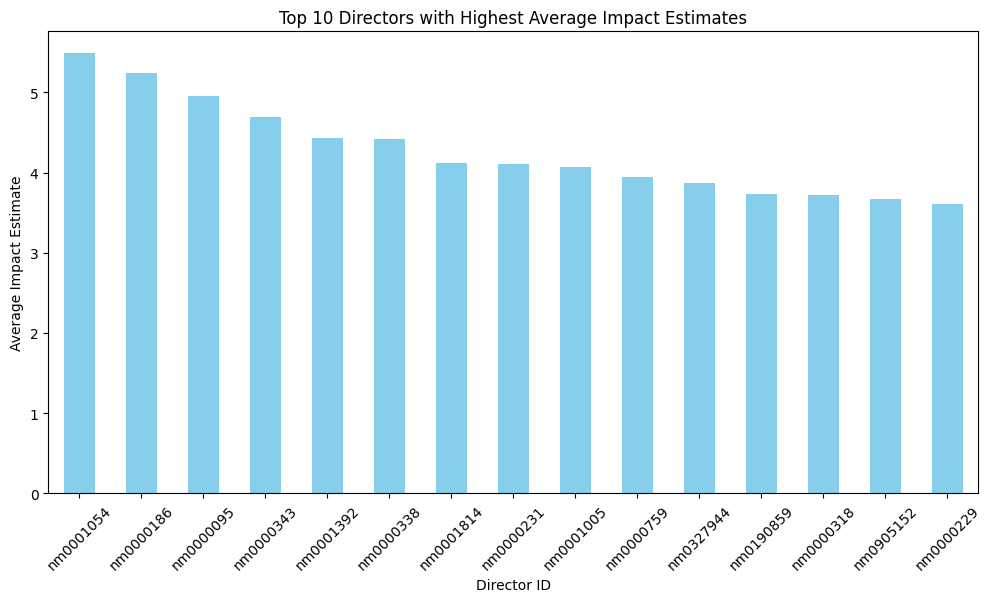

In [70]:
import matplotlib.pyplot as plt

# Assuming `impact_analysis_df` contains the impact analysis results

# Group by Director ID and calculate the average impact estimate
director_impact = impact_analysis_df.groupby('Director ID')['Impact Estimate'].mean().sort_values(ascending=False)

# Select top 10 directors with highest average impact estimates
top_directors = director_impact.head(15)

# Plot the top 10 directors
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.xlabel('Director ID')
plt.ylabel('Average Impact Estimate')
plt.title('Top 10 Directors with Highest Average Impact Estimates')
plt.xticks(rotation=45)
plt.show()



In [29]:
import pandas as pd

# Assuming `impact_analysis_df` contains the impact analysis results

# Group by Director ID and calculate the average impact estimate
director_impact = impact_analysis_df.groupby('Director ID')['Impact Estimate'].mean().sort_values(ascending=False)

# Print the table
print(director_impact)



Director ID
nm0001054    5.485149
nm0000186    5.242236
nm0000095    4.954887
nm0000343    4.698020
nm0001392    4.433333
               ...   
nm0501435   -0.023256
nm0420941   -0.591549
nm2125482   -1.069767
nm1950086   -2.377778
nm1443502   -3.115385
Name: Impact Estimate, Length: 101, dtype: float64


It was observed that certainly not all but some directors have impact on the career of crews. That we calculated using the following formula:

Impact estimate fof a director on a crew = No. of roles the crew has played before collaborating with the director - No. of roles the crew has played after collaborating with the director.

It is observed that the director Woody Allen (nm0000095) has most impact on crews. The average impact estimate for Woody Allen is 3.33. 

The above formula can be biased if the crew has just started their career. So to validate now I will calculate impact estimate using the following formula

$$ \text{Impact Estimate} = \frac{\text{no. of roles of a crew after collaboration} - \text{no. of roles of a crew before collaboration}}{\text{Total no. of roles in their life time}}  $$





In [67]:
# Calculate the year of first collaboration for each crew with each director
all_roles_df_filtered = filtered_crews_df[filtered_crews_df['Movie Year'].astype(str).str.strip() != 'Year not found'].copy()
first_collab_years = all_roles_df_filtered.groupby(['Crew ID', 'Director ID'])['Movie Year'].min()

interaction_matrix = pd.crosstab(all_roles_df_filtered['Crew ID'], all_roles_df_filtered['Director ID'])

impact_analysis_results = []
for crew_id in interaction_matrix.index:
    for director_id in interaction_matrix.columns:
        if interaction_matrix.loc[crew_id, director_id] > 0:
            first_collab_year = first_collab_years.get((crew_id, director_id), None)
            if first_collab_year is not None:
                # Calculate roles before and after collaboration based on the year of first collaboration
                roles_before = all_roles_df_filtered[(all_roles_df_filtered['Crew ID'] == crew_id) & 
                                                  (all_roles_df_filtered['Movie Year'] < first_collab_year)].shape[0]
                roles_after = all_roles_df_filtered[(all_roles_df_filtered['Crew ID'] == crew_id) & 
                                                 (all_roles_df_filtered['Movie Year'] >= first_collab_year)].shape[0]
                
                # Calculate total years the crew has worked
                total_years_worked = all_roles_df_filtered[all_roles_df_filtered['Crew ID'] == crew_id]['Movie Year'].nunique()
                
                # Calculate impact estimate
                impact_estimate = (roles_after - roles_before) / total_years_worked
                
                impact_analysis_results.append({
                    'Crew ID': crew_id,
                    'Director ID': director_id,
                    'Roles Before Collaboration': roles_before,
                    'Roles After Collaboration': roles_after,
                    'Total Years Worked': total_years_worked,
                    'Impact Estimate': impact_estimate
                })

impact_analysis_df = pd.DataFrame(impact_analysis_results)
impact_analysis_df.dropna(subset=['Roles After Collaboration'], inplace=True)
print(impact_analysis_df.sort_values('Total Years Worked', ascending=False))



         Crew ID Director ID  Roles Before Collaboration  \
8384   nm0852681   nm0000095                           0   
8385   nm0852681   nm0000217                           1   
8386   nm0852681   nm0000229                           2   
8387   nm0852681   nm0000338                          15   
3411   nm0281530   nm0000165                          40   
...          ...         ...                         ...   
8051   nm0812842   nm0362566                           0   
3199   nm0262325   nm0001068                           0   
3204   nm0262381   nm0000361                           0   
8048   nm0812029   nm0000165                           0   
12159  nm9958392   nm0298807                           0   

       Roles After Collaboration  Total Years Worked  Impact Estimate  
8384                          48                  41         1.170732  
8385                          47                  41         1.121951  
8386                          46                  41         1.

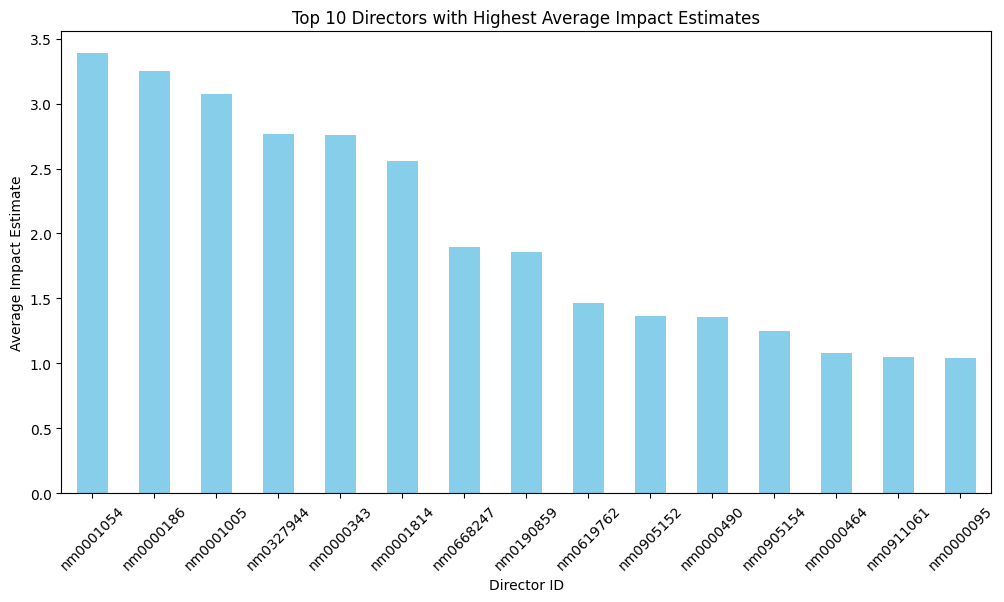

In [68]:
import matplotlib.pyplot as plt

# Assuming `impact_analysis_df` contains the impact analysis results

# Group by Director ID and calculate the average impact estimate
director_impact = impact_analysis_df.groupby('Director ID')['Impact Estimate'].mean().sort_values(ascending=False)

# Select top 10 directors with highest average impact estimates
top_directors = director_impact.head(15)

# Plot the top 10 directors
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.xlabel('Director ID')
plt.ylabel('Average Impact Estimate')
plt.title('Top 10 Directors with Highest Average Impact Estimates')
plt.xticks(rotation=45)
plt.show()

### Research Question - 2
#### **Measure how roles of crew members fluctuate**


In [54]:
import pandas as pd

# Calculate the number of different roles held by each crew member over time
role_stability = all_roles_df.groupby('Crew Name')['Normalized Role'].nunique()

# Calculate the frequency distribution of these unique roles
role_frequency = role_stability.value_counts()

# Calculate the total number of crew members
total_crew = role_stability.count()

# Calculate the percentage of total crew members for each unique role count
role_percentage = (role_frequency / total_crew) * 100

# Initialize a dictionary to store crew names for each role count
crew_names_dict = {i: [] for i in range(1, role_stability.max() + 1)}

# Iterate over crew names and append to the corresponding list
for crew_name, count in role_stability.items():
    crew_names_dict[count].append(crew_name)

# Create a DataFrame to hold the frequency and percentage
role_summary = pd.DataFrame({
    'Number of Crews': role_frequency,
    'Percentage of Crews (%)': role_percentage
})

# Convert the crew names dictionary to a list and add it to the DataFrame
role_summary['Crew Names'] = role_summary.index.map(lambda x: crew_names_dict[x])

# Show the result
print(role_summary)


                 Number of Crews  Percentage of Crews (%)  \
Normalized Role                                             
1                           7263                95.855880   
2                            218                 2.877128   
3                             70                 0.923848   
4                             20                 0.263957   
5                              5                 0.065989   
6                              1                 0.013198   

                                                        Crew Names  
Normalized Role                                                     
1                [A. Kitman Ho, A.E. Hotchner, A.J. Dix, A.J. E...  
2                [Aki Kaurismäki, Alejandro González Iñárritu, ...  
3                [Adam McKay, Alexander Payne, Amy Heckerling, ...  
4                [Alfonso Cuarón, Brian De Palma, Cary Joji Fuk...  
5                [Alejandro G. Iñárritu, Jim Jarmusch, Robert R...  
6                           

**Explanation**

* **Normalized Role -** This column shows no. of unique roles those crews have played.


* **Number of crews** - This column shows the absolute number of crew members who have each count of unique roles.

* **Percentage of Crews (%):** This column shows what percentage of the total crew population each unique role count represents.

As we can see there is not much flucation in roles of crews. Maximum percentage of crews have played the same role in each movie. Only a very few fraction, almost neglegible, of crews have played unique roles.

In [53]:
print(role_stability['Jim Jarmusch'])


5


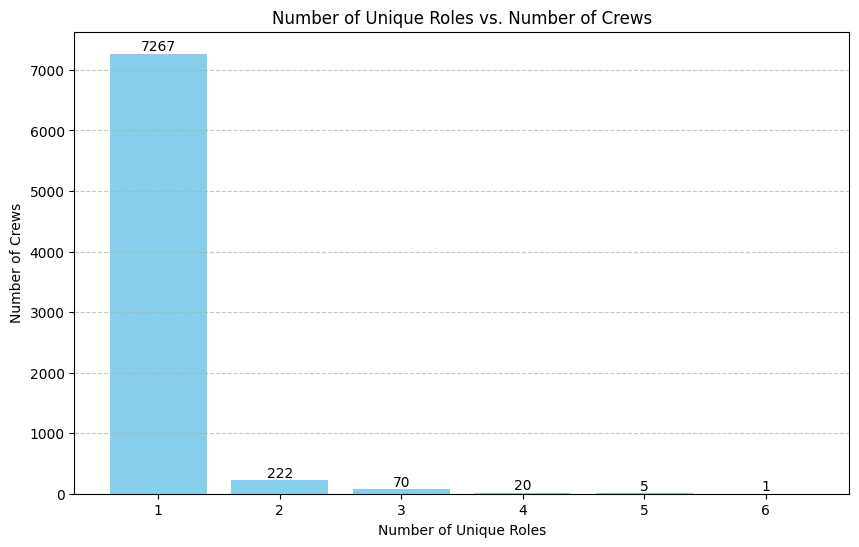

In [35]:
import matplotlib.pyplot as plt

# Assuming role_summary DataFrame already contains the necessary data:
# Number of Crews represents the count of crew members for each unique role count.

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(role_summary.index, role_summary['Number of Crews'], color='skyblue')

plt.title('Number of Unique Roles vs. Number of Crews')
plt.xlabel('Number of Unique Roles')
plt.ylabel('Number of Crews')
plt.xticks(role_summary.index)  # Ensure all role counts are labeled

# Adding text labels on each bar to show the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5,  # slight offset to move the text above the bar
             int(yval),  # convert to int, if needed, for better formatting
             ha='center', va='bottom')  # horizontal alignment is center, vertical is bottom from the text point

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The plot reflects how roles of crew memebrs fluctuate. And it is clear from the plot that there is not much fluctation in roles. 

In [36]:
import pandas as pd

# Calculate the total number of projects for each crew member
total_projects = all_roles_df.groupby('Crew Name').size()

# Calculate the number of different roles held by each crew member over time
unique_roles = all_roles_df.groupby('Crew Name')['Normalized Role'].nunique()

# Combine the series into a DataFrame
crew_summary = pd.DataFrame({
    'Total Projects': total_projects,
    'Unique Roles': unique_roles
})

# Calculate the percentage of unique roles per total projects
crew_summary['Role Diversity (%)'] = (crew_summary['Unique Roles'] / crew_summary['Total Projects']) * 100

# Sort to see those with the highest role diversity
crew_summary = crew_summary.sort_values(by='Unique Roles', ascending=False)

# Show the result
print(crew_summary)


                       Total Projects  Unique Roles  Role Diversity (%)
Crew Name                                                              
David Lynch                        43             6           13.953488
Steven Soderbergh                  73             5            6.849315
Robert Rodriguez                   14             5           35.714286
Alejandro G. Iñárritu              35             5           14.285714
Jim Jarmusch                       39             5           12.820513
...                               ...           ...                 ...
Gloria Norris                       1             1          100.000000
Gloria Katz                         1             1          100.000000
Gloria Gresham                      2             1           50.000000
Glenys Jackson                      1             1          100.000000
Éric Guichard                       4             1           25.000000

[7585 rows x 3 columns]


**David Lynch (director id = nm0000186) has highest fluctaion in roles. He has worked in total 43 movies in 6 unuique roles.**